## Machine Learning - Optimal Ensemble

### Loading Data:

In [1]:
import pandas as pd
# Note: import new json with new variables calculated below in order to save time:
data_new_var=pd.read_json('data_new_var.json')
data = data_new_var

In [2]:
# data_gr: Get only readability predictors:
data_gr= data[[ 'Size', 'Num_syl', 'Num_words', 'Num_sent', 'Padding', 
               'FE_idx', 'DC_idx', 'DC_dif_words', 'Smog_Grade_idx',
               'FK_Grade_idx', 'CL_Grade_idx', 'ARI_Grade_idx', 'LW_Grade_idx', 'GFox_Grade_idx', 'Num_syl_MD', 
               'Size_MD','Num_words_MD', 'Num_sent_MD', 'Padding_MD', 'FE_idx_MD', 'DC_idx_MD', 'DC_dif_words_MD', 
               'Smog_Grade_idx_MD', 'FK_Grade_idx_MD', 'CL_Grade_idx_MD', 'ARI_Grade_idx_MD', 'LW_Grade_idx_MD', 
               'GFox_Grade_idx_MD', 'Num_syl_QA','Size_QA', 'Num_words_QA', 'Num_sent_QA', 'Padding_QA', 'FE_idx_QA', 
               'DC_idx_QA', 'DC_dif_words_QA', 'Smog_Grade_idx_QA', 'FK_Grade_idx_QA', 'CL_Grade_idx_QA', 
               'ARI_Grade_idx_QA', 'LW_Grade_idx_QA', 'GFox_Grade_idx_QA']]
len(data_gr.columns) # 42 numerical predictors
data_gr.describe() # depending what ML method use you might to scale first 

,Size,Num_syl,Num_words,Num_sent,Padding,FE_idx,DC_idx,DC_dif_words,Smog_Grade_idx,FK_Grade_idx,...,Padding_QA,FE_idx_QA,DC_idx_QA,DC_dif_words_QA,Smog_Grade_idx_QA,FK_Grade_idx_QA,CL_Grade_idx_QA,ARI_Grade_idx_QA,LW_Grade_idx_QA,GFox_Grade_idx_QA
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,...,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,56774.032258,14144.990323,9730.645161,548.268817,0.483978,34.039032,6.433118,1138.978495,4.877419,8.365591,...,0.508065,31.753656,6.553011,695.559140,3.618280,8.049462,9.966882,9.860215,5.967742,9.367742
std,21679.058099,5496.045418,3848.290430,183.467752,0.026133,6.149230,0.384029,305.182803,2.654779,1.351931,...,0.036184,13.947675,1.389671,197.664651,1.735308,1.881409,3.695740,3.504970,2.319350,3.697860
min,6473.000000,1649.700000,1031.000000,51.000000,0.420000,23.780000,5.850000,280.000000,3.100000,5.600000,...,0.250000,21.410000,5.890000,2.000000,0.000000,6.000000,8.230000,7.000000,1.000000,7.200000
25%,49789.000000,12310.200000,8449.000000,477.000000,0.460000,28.860000,6.220000,1011.000000,3.100000,7.600000,...,0.490000,27.840000,6.210000,619.000000,3.100000,7.200000,9.160000,8.600000,4.500000,8.400000
50%,56398.000000,14196.600000,9746.000000,553.000000,0.480000,34.950000,6.400000,1142.000000,3.100000,8.400000,...,0.510000,29.870000,6.380000,698.000000,3.100000,7.900000,9.520000,9.400000,5.500000,8.800000
75%,63344.000000,15813.900000,10655.000000,633.000000,0.500000,37.320000,6.560000,1272.000000,8.800000,9.100000,...,0.530000,32.920000,6.580000,806.000000,3.100000,8.400000,9.990000,10.100000,7.000000,9.600000
max,210592.000000,53848.800000,37412.000000,1583.000000,0.550000,51.530000,8.920000,2998.000000,8.800000,14.200000,...,0.560000,157.450000,19.530000,1147.000000,8.800000,21.800000,44.800000,40.800000,18.000000,42.800000


In [3]:
# data_sent: Get only sentiment+syntax+semantic Indicators
import numpy as np
# Get only readability predictors:
data_sent= data[[ 'Polarity', 'Polarity_QA', 'Subjectivity', 'Subjectivity_QA',
                 'neg_perc_abs', 'neg_perc_rel', 'pos_perc_abs', 'pos_perc_rel','unc_perc_abs', 'unc_perc_rel',
                 'v_comp', 'v_comp_MD', 'v_comp_QA', 'v_neg', 'v_neg_MD', 'v_neg_QA', 'v_neu', 'v_neu_MD', 'v_neu_QA',
                 'v_pos', 'v_pos_MD', 'v_pos_QA', 'w_mod_perc_abs', 'w_mod_perc_rel'
                ]]

data_sent.fillna(np.nanmean(data_sent),inplace=True)
len(data_sent.columns) # 24 numerical predictors
data_sent.describe() # you need to scale first

C:\Users\Carlo\Anaconda2\lib\site-packages\pandas\core\frame.py:2762: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,Polarity,Polarity_QA,Subjectivity,Subjectivity_QA,neg_perc_abs,neg_perc_rel,pos_perc_abs,pos_perc_rel,unc_perc_abs,unc_perc_rel,...,v_neg_MD,v_neg_QA,v_neu,v_neu_MD,v_neu_QA,v_pos,v_pos_MD,v_pos_QA,w_mod_perc_abs,w_mod_perc_rel
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,...,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,0.094675,-0.047669,0.068451,0.069818,0.018872,0.187972,0.028705,0.286304,0.015562,0.153723,...,0.054794,0.065587,0.879199,0.884357,0.879257,0.213371,0.153589,0.245192,0.007331,0.072351
std,0.147835,0.202291,0.009777,0.046538,0.004658,0.043206,0.005006,0.046664,0.004245,0.034157,...,0.014699,0.041173,0.027835,0.017293,0.038059,0.049806,0.021697,0.068170,0.002250,0.018539
min,-0.227848,-0.999999,0.049780,0.042358,0.011325,0.110333,0.017044,0.177453,0.007700,0.088235,...,0.027500,0.023455,0.778887,0.836053,0.762396,0.109614,0.108308,0.091524,0.003347,0.034301
25%,-0.010830,-0.159091,0.062305,0.057247,0.015445,0.152244,0.025709,0.262821,0.012478,0.127358,...,0.044750,0.046639,0.860199,0.873145,0.857936,0.178993,0.138208,0.199177,0.005526,0.057812
50%,0.092784,-0.051163,0.066434,0.062940,0.018042,0.182830,0.028696,0.283159,0.015212,0.151852,...,0.053143,0.054647,0.880331,0.885531,0.875645,0.214071,0.153585,0.247348,0.007283,0.071942
75%,0.211268,0.070968,0.073845,0.071634,0.021394,0.219643,0.031618,0.314935,0.018049,0.175497,...,0.063600,0.068679,0.898970,0.898300,0.901714,0.247414,0.166529,0.300054,0.008321,0.084071
max,0.478927,0.454545,0.101510,0.500000,0.030227,0.297170,0.046953,0.429072,0.037829,0.343284,...,0.096667,0.318333,0.934839,0.917956,1.000000,0.317834,0.212932,0.360683,0.016802,0.129657


In [4]:
import pandas as pd
import numpy as np
df_t = pd.concat([data_gr,data_sent], axis=1) # Total Sample Readability + Sentiment dfs

### ML - Selected Models - Minimazing Misc. Error and Generalization Error

Load ensemble results below so that you don't have to train models again:

In [63]:
ML_Opt = pd.read_csv('ML_Ensem_Optimal.csv') # Ensemble Optimal=> Min GE and Log-Loss
ML_Logit_RF_Tot = pd.read_csv('ML_Ensem_Logit_RF_Tot.csv') # Ensemble Logit and RF using Total Data

Models selected for ensemble right below are the ones with better balance Minimum Classification Error and Minimum Generalization Error:

- **XGB Text**: uses data_gr
- **PCA Logit Total**: uses df_t
- **RF Total**: uses df_t
- **PCA Logit Syn/Sem**: uses data_sent

**XGB Text**  

In [6]:
# uses data_gr
import sklearn.cross_validation as cv

pred = data_gr
target = data['Target']

x_train, x_test, y_train, y_test = cv.train_test_split(pred, target, test_size=0.20, random_state=0) # Test is 20% data

In [8]:
# Fine-tune XGB model to find the best model:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import log_loss, accuracy_score
import sklearn.grid_search as gs

#label_enc_y = LabelEncoder().fit_transform(y_train)

xgb_model = XGBClassifier()

np.random.seed(1)

# Important: EXCLUDE 'objective' IN THE PARAMETERS BELOW FOR sklearn.xgboost to work properly
# http://stackoverflow.com/questions/35384977/xgbclassifier-num-class-is-invalid

grid_para = [{ 'max_depth':[2,3], # max tree depth for base learners 
              'learning_rate':[0.01,0.005], # = eta
              'n_estimators':[1000, 5000, 10000], # num of boosted trees to fit
              'nthread':[16],
              'colsample_bytree':[0.8]
             }]

grid_xgb = gs.GridSearchCV(xgb_model, grid_para, scoring='accuracy', cv=5)
grid_xgb.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [1000, 5000, 10000], 'learning_rate': [0.01, 0.005], 'colsample_bytree': [0.8], 'max_depth': [2, 3], 'nthread': [16]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [9]:
# Best Parameters
grid_xgb.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.005,
 'max_depth': 3,
 'n_estimators': 5000,
 'nthread': 16}

In [11]:
import sklearn.metrics as metrics

print 'Training Score',grid_xgb.best_estimator_.score(x_train,y_train)
print 'Training Error',1 - grid_xgb.best_estimator_.score(x_train,y_train)
y_train_p = grid_xgb.best_estimator_.predict_proba(x_train)
print 'Overall Training Log-Loss Error', metrics.log_loss(y_train,y_train_p)
print '*'*65
print 'Test Score',grid_xgb.best_estimator_.score(x_test,y_test)
print 'Test Error',1 - grid_xgb.best_estimator_.score(x_test,y_test)
y_test_p = grid_xgb.best_estimator_.predict_proba(x_test)
print 'Overall Test Log-Loss Error', metrics.log_loss(y_test,y_test_p)

 Training Score 1.0
Training Error 0.0
Overall Training Log-Loss Error 0.0408724087913
*****************************************************************
Test Score 0.842105263158
Test Error 0.157894736842
Overall Test Log-Loss Error 0.527723529866


In [13]:
# Ensemble Input
y_xgb_train_p = grid_xgb.best_estimator_.predict(x_train)
y_xgb_train_prob = grid_xgb.best_estimator_.predict_proba(x_train)

y_xgb_test_p = grid_xgb.best_estimator_.predict(x_test)
y_xgb_test_prob = grid_xgb.best_estimator_.predict_proba(x_test)

**PCA Logit Total**  

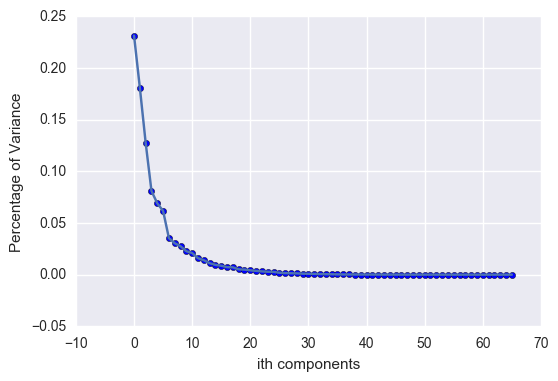

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
pca = PCA()

df_t_s = df_t / np.std(df_t,0) # scaling for PCA

# Checking what number of PCs are best to wok with: 
pca.set_params(n_components = None)
pca.fit(df_t_s)
plt.plot(range(len(df_t_s.columns)), pca.explained_variance_ratio_)
plt.scatter(range(len(df_t_s.columns)), pca.explained_variance_ratio_)
plt.xlabel('ith components')
plt.ylabel('Percentage of Variance')
plt.show()

In [15]:
from sklearn.decomposition import PCA
pca = PCA()
pca.set_params(n_components = 16) # only obtain 3 PCs = p
pca.fit(df_t_s)

print 'Aggregated Explained Variance', 100*round(sum(pca.explained_variance_ratio_),2)
print '*'*65
print 'Explained Variance per  PC:'
print '*'*65
print pca.explained_variance_ratio_
print '*'*65
print 'PCA Eigenvectors'
print '*'*65
print pca.components_ # WARNING: these are eigenvectors, not PCs => remember PCs live in the obs space so 3x3 matrix doesn't make sense for PCs
print '*'*65
print 'PCs'
print '*'*65
print pca.transform(df_t_s) # WARNING: these are eigenvectors, not PCs => remember PCs live in the obs space so 3x3 matrix doesn't make sense for PCs

Aggregated Explained Variance 95.0
*****************************************************************
Explained Variance per  PC:
*****************************************************************
[ 0.23130789  0.18092125  0.12761007  0.08097086  0.06902264  0.06169577
  0.03537737  0.03041254  0.02749783  0.02269523  0.0209422   0.01597056
  0.01401388  0.01110328  0.00944165  0.00866352]
*****************************************************************
PCA Eigenvectors
*****************************************************************
[[-0.1998068  -0.19680465 -0.20006277 ..., -0.03305734  0.07196311
   0.06304699]
 [ 0.13098076  0.13617806  0.12373762 ..., -0.0410448   0.03932919
   0.00886406]
 [-0.10105844 -0.10368048 -0.11571214 ...,  0.18744966 -0.0599132
  -0.05938558]
 ..., 
 [-0.01348954 -0.01642016 -0.01171516 ...,  0.0182919  -0.04395483
  -0.01962819]
 [ 0.01109968  0.01701681  0.01005861 ..., -0.00614481 -0.1786937
  -0.22796943]
 [-0.02400469 -0.02163471 -0.01315836 ...,  0

In [18]:
import sklearn.cross_validation as cv
import sklearn.linear_model as lm
import sklearn.metrics as metrics

logit = lm.LogisticRegression()

pred = df_t_s
target = data['Target']

x_train, x_test, y_train, y_test = cv.train_test_split(pred, target, test_size=0.20, random_state=0) # Test is 20% data

# PCA Training
pca.set_params(n_components = 17) # only obtain 16 PCs out of 66
pca.fit(x_train)
x_train = pca.transform(x_train)  
x_test = pca.transform(x_test)  

# Logit 
logit.fit(x_train, y_train)
print "The training error is: %.4f" %(1-logit.score(x_train, y_train))
print "The test error is: %.4f" %(1-logit.score(x_test, y_test))
y_train_p = logit.predict_proba(x_train)
y_test_p = logit.predict_proba(x_test)
print 'Training Multi Class Log_loss:', metrics.log_loss(y_train,y_train_p)
print 'Test Multi Class Log_loss:', metrics.log_loss(y_test,y_test_p)

The training error is: 0.1486
The test error is: 0.1579
Training Multi Class Log_loss: 0.342965474627
Test Multi Class Log_loss: 0.358668915309


In [19]:
# Ensemble Input
y_logit_train_p = logit.predict(x_train)
y_logit_train_prob = logit.predict_proba(x_train)

y_logit_test_p = logit.predict(x_test)
y_logit_test_prob = logit.predict_proba(x_test)

** RF Total**

In [40]:
# Split Train/Test data:
import sklearn.cross_validation as cv
import sklearn.metrics as metrics

pred = df_t
target = data['Target']

x_train, x_test, y_train, y_test = cv.train_test_split(pred, target, test_size=0.20, random_state=0) # Test is 20% data

In [41]:
# Fine-tune RF model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, accuracy_score
import sklearn.grid_search as gs

randomForest = RandomForestClassifier()
np.random.seed(1)

grid_para_forest = [{"n_estimators": [10, 50, 100], "criterion": ["gini", "entropy"], \
                    "min_samples_leaf": range(1, 10), "min_samples_split": np.linspace(2, 30, 15), \
                    'max_features':['auto','log2',10]}]
grid_search_forest = gs.GridSearchCV(randomForest, grid_para_forest, scoring='accuracy', cv=5)
grid_search_forest.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 50, 100], 'min_samples_split': array([  2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,
        24.,  26.,  28.,  30.]), 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'log2', 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [42]:
## best parameter
grid_search_forest.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4.0,
 'n_estimators': 50}

In [43]:
## best and overall score
print 'Best Score:',grid_search_forest.best_score_
print 'Best Error:',1- grid_search_forest.best_score_
print 65*'*'
print 'Overall Training Score:', grid_search_forest.score(x_train,y_train)  
print 'Overall Training Error', 1-grid_search_forest.score(x_train,y_train)
y_train_p = grid_search_forest.predict_proba(x_train)
print 'Overall Training Log-Loss Error', metrics.log_loss(y_train,y_train_p)
print 65*'*'
print 'Overall Test Score:', grid_search_forest.score(x_test,y_test)  
print 'Overall Test Error', 1-grid_search_forest.score(x_test,y_test)
y_test_p = grid_search_forest.predict_proba(x_test)
print 'Overall Test Log-Loss Error', metrics.log_loss(y_test,y_test_p)

Best Score: 0.878378378378
Best Error: 0.121621621622
*****************************************************************
Overall Training Score: 1.0
Overall Training Error 0.0
Overall Training Log-Loss Error 0.156279808886
*****************************************************************
Overall Test Score: 0.789473684211
Overall Test Error 0.210526315789
Overall Test Log-Loss Error 0.416160069888


In [44]:
# Best Model Training:
randomForest = RandomForestClassifier(criterion='gini',max_features= 'auto', min_samples_leaf= 1, \
                                               min_samples_split= 4.0, n_estimators= 50)
randomForest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=4.0,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
print 'Best Training Score:',randomForest.score(x_train,y_train)
print 'Best Training Error:',1- randomForest.score(x_train,y_train)
y_train_p = randomForest.predict_proba(x_train)
print 'Overall Train Log-Loss Error', metrics.log_loss(y_train,y_train_p)

print 'Best Test Score:',randomForest.score(x_test,y_test)
print 'Best Test Error:',1- randomForest.score(x_test,y_test)
y_test_p = randomForest.predict_proba(x_test)
print 'Overall Test Log-Loss Error', metrics.log_loss(y_test,y_test_p)

Best Training Score: 1.0
Best Training Error: 0.0
Overall Train Log-Loss Error 0.16213222578
Best Test Score: 0.789473684211
Best Test Error: 0.210526315789
Overall Test Log-Loss Error 0.420290820315


In [46]:
# Ensemble Input
# Ensemble Input
y_rf_train_p = randomForest.predict(x_train)
y_rf_train_prob = randomForest.predict_proba(x_train)

y_rf_test_p = randomForest.predict(x_test)
y_rf_test_prob = randomForest.predict_proba(x_test)

** PCA Logit Syn/Sem **

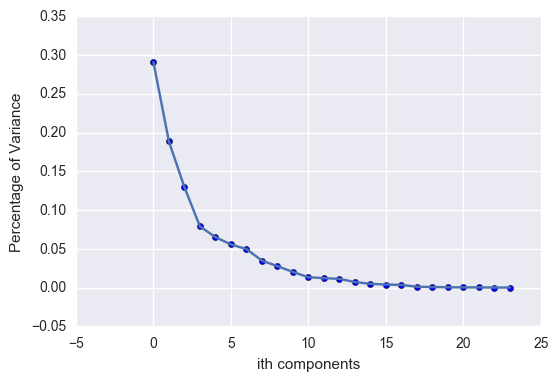

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
pca = PCA()

data_sent_s = data_sent / np.std(data_sent,0) # scaling for PCA

# Checking what number of PCs are best to wok with: 
pca.set_params(n_components = None)
pca.fit(data_sent_s)
plt.plot(range(len(data_sent_s.columns)), pca.explained_variance_ratio_)
plt.scatter(range(len(data_sent_s.columns)), pca.explained_variance_ratio_)
plt.xlabel('ith components')
plt.ylabel('Percentage of Variance')
plt.show()

In [32]:
from sklearn.decomposition import PCA
pca = PCA()
pca.set_params(n_components = 12) # only obtain 3 PCs = p
pca.fit(data_sent_s)

print 'Aggregated Explained Variance', 100*round(sum(pca.explained_variance_ratio_),2)
print '*'*65
print 'Explained Variance per  PC:'
print '*'*65
print pca.explained_variance_ratio_
print '*'*65
print 'PCA Eigenvectors'
print '*'*65
print pca.components_ # WARNING: these are eigenvectors, not PCs => remember PCs live in the obs space so 3x3 matrix doesn't make sense for PCs
print '*'*65
print 'PCs'
print '*'*65
print pca.transform(data_sent_s) # WARNING: these are eigenvectors, not PCs => remember PCs live in the obs space so 3x3 matrix doesn't make sense for PCs


Aggregated Explained Variance 97.0
*****************************************************************
Explained Variance per  PC:
*****************************************************************
[ 0.29093718  0.18858639  0.1295608   0.07894691  0.06509019  0.05566414
  0.04966892  0.03478698  0.02764545  0.02016397  0.01333225  0.01217238]
*****************************************************************
PCA Eigenvectors
*****************************************************************
[[ -2.72890483e-01  -2.32800580e-01   1.79778425e-01   1.56133565e-01
    2.63248547e-01   2.63840858e-01  -2.48377096e-01  -2.93735102e-01
    4.61276439e-02   2.95441609e-02  -2.88536980e-01  -2.80918684e-01
   -2.37584087e-01   1.41807346e-01   2.11190257e-01   1.19516380e-01
    1.99809778e-01   1.91230542e-01   1.93070503e-01  -2.04614390e-01
   -2.03748579e-01  -1.65148468e-01   4.06448099e-02   3.26658027e-02]
 [ -1.92094426e-01  -2.05248202e-02   7.11467703e-02  -1.71308292e-01
    1.93759301e-01

In [35]:
import sklearn.cross_validation as cv
import sklearn.linear_model as lm
import sklearn.metrics as metrics

logit = lm.LogisticRegression()

pred = data_sent_s
target = data['Target']

x_train, x_test, y_train, y_test = cv.train_test_split(pred, target, test_size=0.20, random_state=0) # Test is 20% data

# PCA Training
pca.set_params(n_components = 12) # only obtain 7 PCs => from our previous analysis
pca.fit(x_train)
x_train = pca.transform(x_train) # Use 7 PCs as predictors to reduce complexity from the original 36 predictors 
x_test = pca.transform(x_test) # Use 7 PCs as predictors to reduce complexity from the original 36 predictors 

# Logit 
logit.fit(x_train, y_train)
print "The training error is: %.4f" %(1-logit.score(x_train, y_train))
print "The test error is: %.4f" %(1-logit.score(x_test, y_test))
y_train_p = logit.predict_proba(x_train)
y_test_p = logit.predict_proba(x_test)
print 'Training Multi Class Log_loss:', metrics.log_loss(y_train,y_train_p)
print 'Test Multi Class Log_loss:', metrics.log_loss(y_test,y_test_p)

The training error is: 0.1486
The test error is: 0.2105
Training Multi Class Log_loss: 0.398282697455
Test Multi Class Log_loss: 0.541899051837


In [34]:
# Cross-Validation
import sklearn.cross_validation as cv
stratify_divide = cv.StratifiedKFold(y_train, 5, random_state=0)
scores = cv.cross_val_score(logit, x_train, y_train, cv=stratify_divide)
print 'CV Error rates per fold:', 1- scores
print 'CV Average Error', 1-np.mean(scores)
print 'CV Error Std. Dev', np.std(scores)

CV Error rates per fold: [ 0.13333333  0.2         0.2         0.26666667  0.21428571]
CV Average Error 0.202857142857
CV Error Std. Dev 0.0425491579118


In [36]:
# Ensemble Input
y_logitsent_train_p = logit.predict(x_train)
y_logitsent_train_prob = logit.predict_proba(x_train)

y_logitsent_test_p = logit.predict(x_test)
y_logitsent_test_prob = logit.predict_proba(x_test)

## ML Assemble

### Ensemble Model 1: Soft  = Majority Rule

In [59]:
# Train Ensemble
y_target = y_train

y_logit_prob = y_logit_train_prob
y_rf_prob = y_rf_train_prob
y_xgb_prob = y_xgb_train_prob
y_logitsent_prob = y_logitsent_train_prob


df_pred = pd.DataFrame({'0_logit':y_logit_prob[:,0], '1_logit':y_logit_prob[:,1],
                        '0_rf': y_rf_prob[:,0], '1_rf': y_rf_prob[:,1], 
                        '0_xgb':y_xgb_prob[:,0], '1_xgb':y_xgb_prob[:,1],
                        '0_logitsent':y_logitsent_prob[:,0], '1_logitsent':y_logitsent_prob[:,1]
                       })
df_pred['0_avg']= np.average(df_pred[['0_logit','0_rf','0_xgb','0_logitsent']],axis=1)
df_pred['1_avg']= np.average(df_pred[['1_logit','1_rf','1_xgb','1_logitsent']],axis=1)
df_pred['Pred']= [0 if list(df_pred['0_avg'])[i] > list(df_pred['1_avg'])[i] else 1 for i in range(0,len(df_pred),1)]

score = float(sum(y_target==df_pred['Pred']))/len(y_target)
error = 1- score

print 'Ensemble Train Score', round(score,5)
print 'Ensemble Train Error', round(1 - score,5)
print 'Ensemble Train Log-Loss', round(metrics.log_loss(y_target,np.array(df_pred[['0_avg','1_avg']])),5)

Ensemble Train Score 0.98649
Ensemble Train Error 0.01351
Ensemble Train Log-Loss 0.20117


In [60]:
# Test Ensemble
y_target = y_test

y_logit_prob = y_logit_test_prob
y_rf_prob = y_rf_test_prob
y_xgb_prob = y_xgb_test_prob
y_logitsent_prob = y_logitsent_test_prob


df_pred = pd.DataFrame({'0_logit':y_logit_prob[:,0], '1_logit':y_logit_prob[:,1],
                        '0_rf': y_rf_prob[:,0], '1_rf': y_rf_prob[:,1], 
                        '0_xgb':y_xgb_prob[:,0], '1_xgb':y_xgb_prob[:,1],
                        '0_logitsent':y_logitsent_prob[:,0], '1_logitsent':y_logitsent_prob[:,1],
                       })
df_pred['0_avg']= np.average(df_pred[['0_logit','0_rf','0_xgb','0_logitsent']],axis=1)
df_pred['1_avg']= np.average(df_pred[['1_logit','1_rf','1_xgb','1_logitsent']],axis=1)
df_pred['Pred']= [0 if list(df_pred['0_avg'])[i] > list(df_pred['1_avg'])[i] else 1 for i in range(0,len(df_pred),1)]

score = float(sum(y_target==df_pred['Pred']))/len(y_target)
error = 1- score


print 'Ensemble Test Score', round(score,5)
print 'Ensemble Test Error', round(1 - score,5)
print 'Ensemble Test Log-Loss', round(metrics.log_loss(y_target,np.array(df_pred[['0_avg','1_avg']])),5)

Ensemble Test Score 0.84211
Ensemble Test Error 0.15789
Ensemble Test Log-Loss 0.36726


### Ensemble Model 2: Soft  = Majority Rule - Only PCA Logit Total and RF Total

In [55]:
# Train Ensemble
y_target = y_train

y_logit_prob = y_logit_train_prob
y_rf_prob = y_rf_train_prob


df_pred = pd.DataFrame({'0_logit':y_logit_prob[:,0], '1_logit':y_logit_prob[:,1],
                        '0_rf': y_rf_prob[:,0], '1_rf': y_rf_prob[:,1]                    
                       })
df_pred['0_avg']= np.average(df_pred[['0_logit','0_rf']],axis=1)
df_pred['1_avg']= np.average(df_pred[['1_logit','1_rf',]],axis=1)
df_pred['Pred']= [0 if list(df_pred['0_avg'])[i] > list(df_pred['1_avg'])[i] else 1 for i in range(0,len(df_pred),1)]

score = float(sum(y_target==df_pred['Pred']))/len(y_target)
error = 1- score

print 'Ensemble Train Score', round(score,5)
print 'Ensemble Train Error', round(1 - score,5)
print 'Ensemble Train Log-Loss', round(metrics.log_loss(y_target,np.array(df_pred[['0_avg','1_avg']])),5)

Ensemble Train Score 0.95946
Ensemble Train Error 0.04054
Ensemble Train Log-Loss 0.22908


In [56]:
# Test Ensemble
y_target = y_test

y_logit_prob = y_logit_test_prob
y_rf_prob = y_rf_test_prob


df_pred = pd.DataFrame({'0_logit':y_logit_prob[:,0], '1_logit':y_logit_prob[:,1],
                        '0_rf': y_rf_prob[:,0], '1_rf': y_rf_prob[:,1]                       })

df_pred['0_avg']= np.average(df_pred[['0_logit','0_rf']],axis=1)
df_pred['1_avg']= np.average(df_pred[['1_logit','1_rf']],axis=1)
df_pred['Pred']= [0 if list(df_pred['0_avg'])[i] > list(df_pred['1_avg'])[i] else 1 for i in range(0,len(df_pred),1)]

score = float(sum(y_target==df_pred['Pred']))/len(y_target)
error = 1- score


print 'Ensemble Test Score', round(score,5)
print 'Ensemble Test Error', round(1 - score,5)
print 'Ensemble Test Log-Loss', round(metrics.log_loss(y_target,np.array(df_pred[['0_avg','1_avg']])),5)

Ensemble Test Score 0.78947
Ensemble Test Error 0.21053
Ensemble Test Log-Loss 0.37747
